<a href="https://colab.research.google.com/github/grandhigowthamramsai123/mrm/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic (4).csv


In [209]:
df=pd.read_csv('titanic.csv')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [211]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
df['Age'].fillna(df['Age'].median(),inplace = True)

/tmp/ipython-input-1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


In [213]:
df = df.drop(['PassengerId','Cabin','Embarked','Name','Ticket'], axis=1, errors='ignore')

In [214]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [215]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).fillna(0).astype(int)

In [216]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [218]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [219]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]

y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [220]:
df=df.drop(['Survived'], axis=1, errors='ignore')

In [221]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,28.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [222]:

mean = df.mean(axis=0)
std = df.std(axis=0, ddof=1)
df_std = (df - mean) / std

In [223]:
cov = np.cov(df, rowvar=False)

In [224]:
evl, evt = np.linalg.eigh(cov)

In [225]:
idx = np.argsort(evl)[::-1]
evl = evl[idx]
evt = evt[:,idx]

In [226]:
var_ratio = evl / np.sum(evl)
print("\nExplained Variance Ratio:", var_ratio)


Explained Variance Ratio: [9.35525520e-01 6.35843817e-02 4.76488723e-04 1.78629480e-04
 1.59275886e-04 7.57043689e-05]


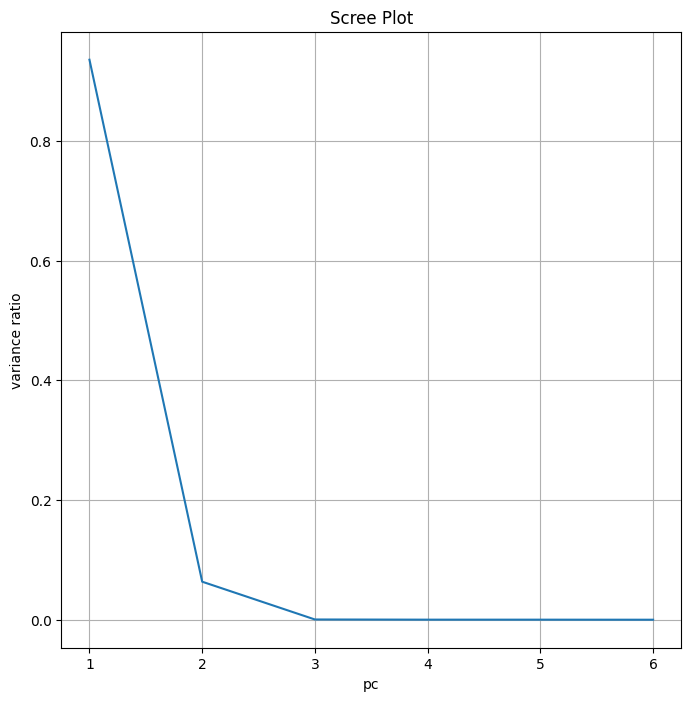

In [227]:
plt.figure(figsize=(8,8))
plt.plot(range(1, len(var_ratio)+1),
         var_ratio)
plt.title("Scree Plot")
plt.xlabel("pc")
plt.ylabel("variance ratio")
plt.xticks(range(1, len(var_ratio)+1))
plt.grid(True)
plt.show()

In [228]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


I use n=4

In [229]:

comp = evt[:, :4]

df_pca = np.dot(df_std, comp)
print("df_pca shape:", df_pca.shape)

df_pca shape: (891, 4)


In [230]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [231]:
y_svm = y.copy()
y_svm = y_svm.replace({0: -1, 1: 1})
y_svm = y_svm.values.astype(float)

X = df_pca.astype(float)

In [238]:

y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [239]:
y_svm

array([-1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1

In [240]:
split = int(0.8 * len(X))

train_x = X[:split]
test_x  = X[split:]

train_y = y_svm[:split]
test_y  = y_svm[split:]
train_y1 = y[:split]
test_y1  = y[split:]

In [241]:
print(type(train_x), type(train_y))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [242]:
class svm:
    def __init__(self, X, Y):

        self.X = np.asarray(X)
        self.Y = np.asarray(Y).reshape(-1)




        n, n_features = self.X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

    def train(self, epochs, lr, lambd):
        X = self.X
        Y = self.Y
        n = len(Y)

        for epoch in range(epochs):
            for i in range(n):
                x = X[i]
                y = Y[i]

                condition = y * (np.dot(x, self.weights) + self.bias)

                if condition >= 1:
                    self.weights -= lr * (2 * lambd * self.weights)
                else:
                    self.weights += lr * (y * x - 2 * lambd * self.weights)
                    self.bias += lr * y

    def predict(self, X):
        X = np.asarray(X)


        if X.ndim == 1:
            X = X.reshape(-1, self.weights.shape[0])

        return np.sign(np.dot(X, self.weights) + self.bias)

    def test(self, ypred, Y):
        ypred = pd.Series(ypred).reset_index(drop=True)
        Y = pd.Series(Y).reset_index(drop=True)

        cm = pd.crosstab(
            pd.Series(Y, name="Actual"),
            pd.Series(ypred, name="Predicted")
        )
        print(cm)




In [243]:
model = svm(train_x, train_y)
model.train(epochs=5000, lr=0.05,lambd=0.04)

preds = model.predict(test_x)
model.test(preds, test_y)

Predicted  -1.0   1.0
Actual               
-1.0        113     2
 1.0         54    10


In [246]:
class LogisticRegression:
    def __init__(self, X, Y):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y).reshape(-1, 1)
        self.weights = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def train(self, epochs=1000, lr=0.01):
        X = self.X
        Y = self.Y


        X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.weights = np.zeros((X.shape[1], 1))

        for _ in range(epochs):
            z = np.dot(X, self.weights)
            preds = self.sigmoid(z)
            error = preds - Y
            self.weights -= lr * np.dot(X.T, error) / X.shape[0]

    def predict(self, X):
        X = np.asarray(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.weights)
        return (self.sigmoid(z) >= 0.5).astype(int)

    def test(self, X, Y):
        preds = self.predict(X)
        Y = np.asarray(Y).reshape(-1, 1)
        accuracy = (preds == Y).mean()
        print("Accuracy:", accuracy)
        return preds


In [249]:
model = LogisticRegression(train_x, train_y1)
model.train(epochs=100000, lr=0.05)
preds = model.test(test_x, test_y1)

Accuracy: 0.7486033519553073
